In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

# Homework 6: Exploring Uber and Lyft Prices in Boston

Name: Sophie Warsetsky and Audra Stump

Student ID:
490380
Collaborators:


## Instructions

This homework is an _open-ended midterm project_ for our class. 

We will be using the techniques and approaches introduced in the first half of the semester:

* **[M0] Python for DS**
* **[M1] The DS and ML Workflows**
* **[M2] Exploratory Data Analsyis**
* [M3] Sentiment Analysis (if applicable - depends on problem/dataset)
* [M4] Linear Regression (if applicable - depends on problem/dataset)
* [M5] Linear Classification (if applicable - depends on problem/dataset)
* **[M6]** Learning Principles and **Ethical Thinking for DS**

The main focus of this project is on the first three modules [M0]-[M2], as well as the ethical consderations for DS from [M6]. In particular, it will be helpful to review **Lab 2 & hw2 (Analyzing the MoMA Data)** first. Most of the things you will do in this midterm project are explained in `Lab2` and `hw2`. Then, review the other labs and hws to recap the  general workflow of our DS approaches to the various problems we have worked on so far. This will help you to be prepared for all the steps in this project, so that you do not miss anything. 

In gernal, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend).

Additionally, note that this assignment is more like a project than a typical homework and it will have a slightly different structure than the hws in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the EDA/DS workflow and you will need to fill in the analysis and structure as you go.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. 

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

In [2]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'my answer'

### Submission instructions
* Submit this Python notebook, including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

## 1. Introduction

For our midterm project this semester, we'll take a look at data for numerous Lyft and Uber rides in Boston and their prices (https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma). Our goal will be to use this dataset to gain some insight about characteristics of rides and _perhaps_ find some patterns in this data.

In general, we will be following the EDA process:
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 
7. **Critically review** our workflow and discuss ethical concerns

## 2. Getting Familiar with the Data

In this section, we will get a feel for our data and tidy it up so that we can analyize it later. 
Download the data from the given source/link (cf. `README.md`) and be sure to save the data in a folder called `data` under the `utility` directory.

<!-- BEGIN QUESTION -->

### Problem 1

Let's take a look at the files in `utility/data` and think about what we can and will need to do with it.

**Write-up!** Describe the data, answering questions including, but not limited to, these: Where does the data come from? How was it obtained? How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take?
> **Hint**: Consider the steps of EDA; what would you like to know about this dataset. 

Overview of the Data: This data is a sample set of pricings from Uber and Lyft. The data is 56% Uber and 44% Lyft. 
Where it came from and how it was obtained: The kaggle page did not describe where the data came from or how it was obtained. To perform good data science, the dataset provider should have explicitly provided this information to us. Without this information, this leaves us with open questions including 'is the data complete?', 'is this data a sample?', and 'how are the data points sampled?'.   
Number of examples and features: 
57 features and 693072 examples.

Types of Features in Data Set: 
This data includes 
- time values: timestamp, hour, day of the month, and month of the year, as well as a 'datetime' which just gives the general date, and timezone
- geographical and weather values: latitude, longitude, temperature, humidity, pressure, cloud cover, and wind details
Values of Features in Data Set: 
Our features have a variety of both categorical and numerical values. This means that these values can be ints, strings, and floats. 
Categorical includes cab type, icon, name, and time zone, as well as others. These are all strings.
Numerical features include temperature , distance, latitude and longitude, and also visibility, as well as many others. These ones listed are all doubles, but we can also see for the features month, day, and hour that there are integer numerical variables.
We could also have boolean features, but there are not any listed in this particular dataset. 


### Problem 2

Let's do some data wrangling. 

**Write up!** Considering your description of the dataset from [Problem 1](#Problem-1), how should we clean this data?

**Do this!** In the cells below, **explain** and perform the steps that you need to prepare this data for further analysis. Make sure that your implementations and write-ups (for processing and analysis) are presented well and effectively describe your workflow. You may add comments or markdown cells for your documentation as you see fit!  

*Grading Note: Your work will be graded for _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report.*

> **Hint**: You can use our previous labs as examples of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

For our data cleaning, we removed the rows where we have null values so that our dataset was able to be worked with easily. 

In [3]:
from os.path import exists

#Importing the data into the assigment
data_dir = 'utility/data'
#reading in the data
import pandas as pd
data = pd.read_csv(f'{data_dir}/rideshare_kaggle.csv')
data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [4]:
#getting rid of the null values for any null prices. This will delete the rows where we have null values so that our dataset
#is able to be worked with 

data = data.dropna(how='any',axis=0) 
print(data.price)


0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693065     9.5
693066    13.0
693067     9.5
693069    27.0
693070    10.0
Name: price, Length: 637976, dtype: float64


We should clean this data by getting rid of null values. This allows us to filter the data and get rid of entries where our 
target variable is absent. 

### Problem 3

**Do this!** Now that we cleaned up our data, we are ready to look into it. In this problem, we want to profile our data and explore its variables.

> **Hint**: Note that the way some data is stored does not necesarily mean that each column should correspond to a seperate variable. Feel free to define your own variables based on the input data. Looking at the dataset documentation might be helpful to figure out meaningful representations. Also note that there are no right or wrong representations here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variable representations). Again, you might want to iterate over this step again later after doing some more exploration. 

> **Hint**: Recall from Lab 2, this step usually involves computing summary statistics and basic plots _where applicable_. Try plotting some of the data (with appropriate plots; remember the lecture content - some plots introduced in there ( we did not yet use in the lab or hw) could be useful). Then, highlight a few of the more interesting ones and discuss why you thought they were interesting — for both our sakes, **please only include the most interesting ones** in your actual submission!!  Again note that there are no right or wrong features to choose here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variables to include). Just be sure to make a selection. You will not receive any credit by simply plotting everything!  

*Grading Note*: Your work will be graded for _creativity_ and _aesthetics_. Be creative in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures.* 

Once again, we have provided a _free_ cell for you to use; make as many as you need. Use text/markdown cells to describe what you are doing and what your findings are. 

When we were analyzing the temperature, we noticed a trend towards lower temperatures from our summary statistics. This led us to investigate and see that the data was sampled only in November and December. This presented challenges in our initial idea of the temperature being warm leading to individuals to use Uber/Lyft less frequency. 

Summary Statistics of Temperature

In [5]:
print(f'mean: {data["temperature"].mean()}')
print(f'median: {data["temperature"].median()}')
print(f'standard deviation: {data["temperature"].std()}')
print(f'min: {data["temperature"].min()}')
print(f'max: {data["temperature"].max()}')

mean: 39.58240610932073
median: 40.49
standard deviation: 6.725500160624363
min: 18.91
max: 57.22


Summary Statistics of Price

In [6]:
print(f'mean: {data["price"].mean()}')
print(f'median: {data["price"].median()}')
print(f'standard deviation: {data["price"].std()}')
print(f'min: {data["price"].min()}')
print(f'max: {data["price"].max()}')

mean: 16.545125490614065
median: 13.5
standard deviation: 9.324358581411627
min: 2.5
max: 97.5


Summary Statistics of Distance

In [7]:
print(f'mean: {data["distance"].mean()}')
print(f'median: {data["distance"].median()}')
print(f'standard deviation: {data["distance"].std()}')
print(f'min: {data["distance"].min()}')
print(f'max: {data["distance"].max()}')

mean: 2.189261100731062
median: 2.16
standard deviation: 1.135413018186186
min: 0.02
max: 7.86


Temperature Boxplot

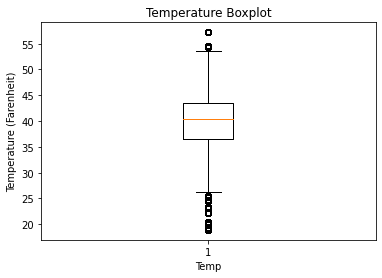

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors
plt.boxplot(data.temperature)
plt.title("Temperature Boxplot")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Temp")
plt.show()

We noticed that the temperature boxplot had a mean of 40 degrees Farenheit and there were many outliers in the data. However, it ranged from roughly 25 to 50 degrees Farenheit. 

Price Boxplot

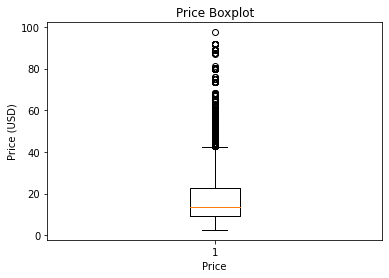

In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors
plt.boxplot(data.price)
plt.title("Price Boxplot")
plt.ylabel("Price (USD)")
plt.xlabel("Price")
plt.show()

We noticed that the price boxplot had a mean of 15 USD and there were many outliers above the maximum.

Distance Boxplot

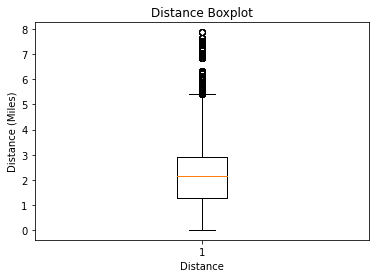

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors
plt.boxplot(data.distance)
plt.title("Distance Boxplot")
plt.ylabel("Distance (Miles)")
plt.xlabel("Distance")
plt.show()

We noticed that the distance boxplot had a mean of 2.2 miles and there were many outliers above the maximum.

Temperature Histogram

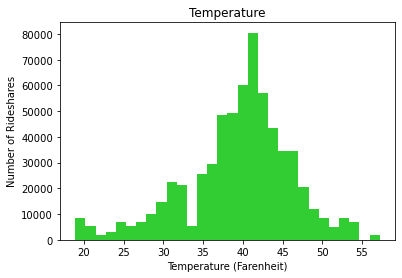

In [11]:
plt.hist(data.temperature, bins=30, color = 'limegreen')
plt.title("Temperature")
plt.ylabel("Number of Rideshares")
plt.xlabel("Temperature (Farenheit)")
plt.show()

The number of rideshares increased as the temperature increased, reaching a maximum of 80,000 rideshares at roughly 42 degrees. After that point, the number of rideshares began to decrease as the temperature increased. This created a bell curve distribution. 

Price Histogram

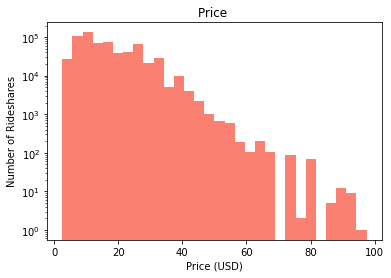

In [12]:
plt.hist(data.price, bins=30, log=True, color = 'salmon')
plt.title("Price ")
plt.ylabel("Number of Rideshares")
plt.xlabel("Price (USD)")
plt.show()

The number of rideshares decreased as price increased. 

Distance Histogram

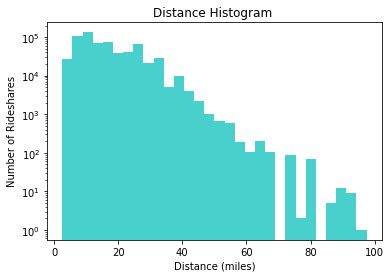

In [13]:
plt.hist(data.price, bins=30, log=True, color = 'mediumturquoise')
plt.title("Distance Histogram ")
plt.ylabel("Number of Rideshares")
plt.xlabel("Distance (miles)")
plt.show()

The number of rideshares decreased as distance increased.

## 3. Asking the Hard Questions

By now we should know all of the ins and outs about this dataset (right?). Let's dive a little deeper into it and see if we can find anything interesting.

### Problem 4

As you worked through the initial data processing and understanding phase, did anything catch your interest? Let's formulate some questions and hypotheses that you could explore in depth.

**Write-up!** Formulate and describe a question you have/want to investigate. Then, formulate and describe a hypothesis that can (possibly) answer it. What inspired your idea (provide specifics from [the last section](#2.-Getting-Familiar-with-the-Data), if any)? How can you use the data to support or reject your hypothesis?

> **Hint**: Your question/hypothesis might be something that you are personally interested in or something that you think might lead to a product or service for users/customers. You might want to think about something that could help others in making decisions, etc.

*Grading Note: Your work will be graded for _creativity_. Be creative in the questions you ask/hypothesis you pose.* 

The histogram of price shows there are more rideshares at lower prices. The histogram for temperature shows there are more rideshares at higher temperatures. We believe that they are inversely related and there are lower prices at higher temperatures and higher prices at lower temperatures. Through scatter plots and linear regression, we are going to evaluate whether price and temperature have an inversely proportional, linear relationship

### Problem 5

**Do this!** Let's explore your hypothesis. Find evidence from the data that supports or refutes your hypothesis and present it — recall that as a data scientist, one of your goals is to discover and communicate your results to your audience, _me_. The more thorough your analysis, the better!

> **Hint**: Even though we focus on EDA here, you may include some predictive modeling here as well. 

Here's yet another _free_ cell; use as many as you need.

First, we investigated the relationship between the temperature and price with a scatterplot. 

<a id="plt-1">Plot 1</a>

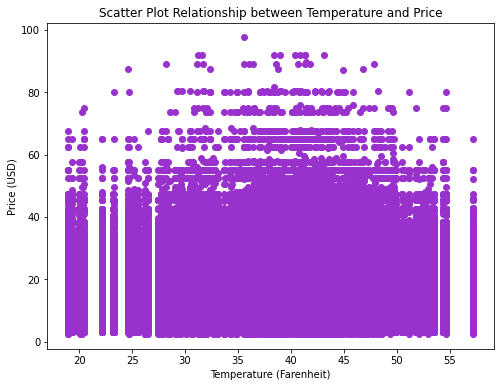

In [14]:
import numpy
plt.figure(figsize = [8,6])
plt.scatter(data.temperature, data.price, color = 'darkorchid')
plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Price (USD)')
plt.title('Scatter Plot Relationship between Temperature and Price')
plt.show()


This scatterplot plots the same variables, however it also includes hues to represent the cab types. 

<a id="plt-2">Plot 2</a>

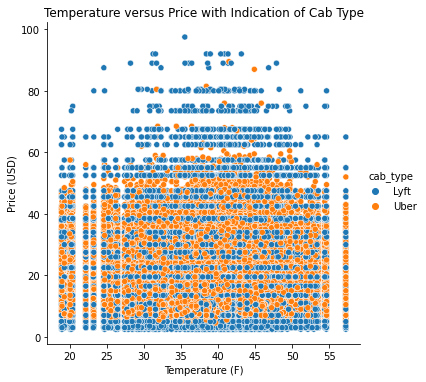

In [16]:
import seaborn as sns
sns.relplot(x="temperature", y="price", hue="cab_type", data=data);
plt.title("Temperature versus Price with Indication of Cab Type")
plt.ylabel("Price (USD)")
plt.xlabel("Temperature (F)")
plt.show()


<a id="model">Linear Regression Model</a>

We are creating a linear regression model to try to map the temperature to price. This will help us determine if there is a relationship based off of the line of best fit. 

-7.286612042034513e-05
9.335658610445261


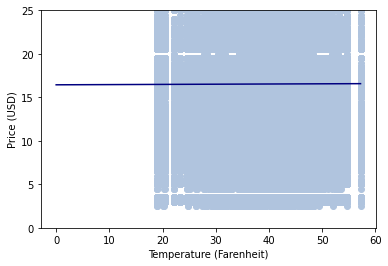

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#first we set our target as the price of a rideshare
target = 'price'
X, y = data.loc[:, data.columns == 'temperature'], data[target]

#here we make our model and split our data into a training and testing set
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=3)

#we next fit the model and predict our y values
x_star = np.linspace(0, X_train.max(), 1000)
model.fit(X_train, y_train)
y_pred = model.predict(x_star)

#We now plot the scatterplot and line of best fit
plt.scatter(X_train, y_train, color="lightsteelblue")
plt.plot(x_star, y_pred, color="navy")
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("Price (USD)")
plt.ylim(0,25)
Y_pred = model.predict(X_test)

# Here, we evaluate our predictions
rmse = np.sqrt(mean_squared_error(y_test, Y_pred))

rsquared = model.score(X_test, y_test)
f'RSquared: {rsquared}'
f'RMSE: {rmse}'

print(rsquared)
print(rmse)

In the process of exploring our hypothesis and this dataset, we also examined other plots that peaked our interest. 

<a id="plt-3">Plot 3</a>

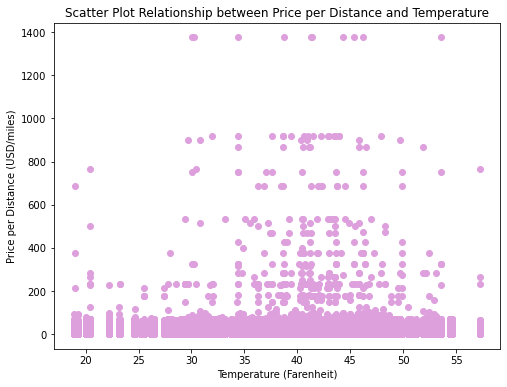

In [18]:
import numpy
plt.figure(figsize = [8,6])
plt.scatter(data.temperature, data.price/data.distance, color = 'plum')

plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Price per Distance (USD/miles)')
plt.title('Scatter Plot Relationship between Price per Distance and Temperature')
plt.show()

<a id="plt-4">Plot 4</a>

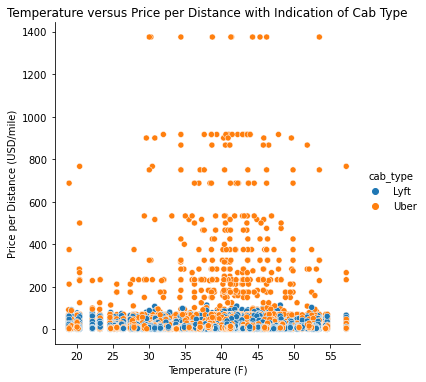

In [19]:
data['price/dist'] = data['price']/data['distance']
import seaborn as sns
sns.relplot(x="temperature", y="price/dist", hue="cab_type", data=data);
plt.title("Temperature versus Price per Distance with Indication of Cab Type")
plt.ylabel("Price per Distance (USD/mile)")
plt.xlabel("Temperature (F)")
plt.show()

### Problem 6

**Write up!** Did you find anything interesting in [Problem 5](#Problem-5)? If you did, tell me about it. If you don't think you found anything interesting, keep looking. 

> **Hint**: Provide links to key figures in your discussion. See [this StackOverflow question](https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown) for details.

Looking at the scatter plot relationship between temperature and price, the scatterplot relationship between temperature and price with indication of cab type, and the linear regression model, we determined that there was no linear relationship between price and temperature. 
From our [first scatter plot](#plt-1), we examined the relationship between temperature and price. However, this plot showed no discernable relationship between the two variables. 
Next, in our [second plot](#plt-2), we attempted to add a legend specifying the cab type to see if there was a relationship between temperature and price for indidual rideshare apps. However, this also did not show a relationship. We did notice that the price of Lyft varied more with respect to temperature than Uber. 
Finally, in our [linear regression model](#model), our line of best fit was completely horizontal, refuting our proposition that the two variables would be inversely proportional. 
These three plots refuted our original hypothesis. 

Upon further inspection of our data, we found something that interested us. Now, instead of merely examining the relationship between price and temperature, we looked at the relationship between price per distance travelled and temperature in [plot 3](#plt-3). 
The scatter plot looked similar to the the original price and temperature scatter plot, which did not tell us much. The original legend plot showed that Lyft's prices varied more with respect to temperature, however, [this new plot](#plt-4) showed that Uber's prices per distance varied more with respect to temperature. We found this interesting and something worth looking into more. 

### Problem 7
One last step that we shouldn't skip is reviewing both our data analysis approach and also the data acquisition method. 

**Write up!** Are there any shortcommings and/or **ethical issues** related to the way you used this data or formed your conclusions?
* Who are the stakeholders?
* How could someone other than yourself be impacted by any ethical issues arising from your analysis/work/product?
* Can you propose a way to resolve the issue(s)?

Who are the stakeholders?: 
The stakeholders are the employees at Uber and Lyft, the drivers, and the Uber and Lyft customers. 

How could someone other than yourself be impacted by any ethical issues arising from your analysis/work/product?: 
If the consumers have this information and can see how price varies amoung the cab types, this could impact how someone would choose which ride share app to use. This would impact the companies and the drivers, especially if they drive both Uber and Lyft, since this might determine which they should work for that day. 

We must take these into account when sharing this data so we can avoid as much harm to the stakeholders as possible.

Can you propose a way to resolve the issue(s)?
Since we don't know where the data comes from or how it was obtained, it's important to investigate the origins and the relationships we find before drawing conclusions and distributing them to the public. The conclusions that we have formed are based on our assumptions about how the data was obtained. This can create ethical concerns, considering we are making these assumptions on a limited dataset from an unreliable data provider. This would be an issue because disseminating these conclusions without confirming them on a reliable dataset would be unfair to the stakeholders. 

To resolve this, we should contact the data provider and get more information about the dataset to ensure that it is reliable. We could also find an alternative dataset with more information from the data provider to ensure the conclusions still hold. 

Let's conclude with thinking about imporvements for the future! 

**Write up!** There are often times where the data you need doesn't exist (yet) and you need to go collect it. Based on your analysis of the data set, which features were informative and which weren't? What information that was missing from this dataset do you think would be helpful to have for next time?

Informative Features: 
Some of the informative features included price, temperature, cab_type, destination, and distance. 

Non Informative Features:
While it was interesting to look at the dewpoint, cloud cover, moon phase, ozone, pressure, productId, and sunrise time, these features were arbitrary and provided no useful information that we have found. 

Missing Information: 
It was difficult to discern the units of some of the data, including features such as temperature, moon phase, and windGust. This made it difficult to evaluate the dataset. 
Another thing that would have been useful to evaluate was the traffic index, the number of ride share drivers, or how many other people were requesting ride shares at the same time. It would have been interesting to consider the impact that competition for a ride share would have upon the price. 

And that's it! Remember to review your work and make sure it is well presented and organized. Not everyting you coded up needs to remain in your submission. **[Does [this cell] spark joy?](https://i.kinja-img.com/gawker-media/image/upload/s--iW_3HGbT--/c_scale,dpr_2.0,f_auto,fl_progressive,q_80,w_800/oruf4oavtj5vpmvaquew.jpg)** You are always trying to communicate your findings to somebody, _maybe even yourself_. 

> **Final Grading Note/Reminder**: Your work will be graded for _creativity_, _aesthetics_, _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report. Be creative in the questions you ask/hypothesis you pose as well as in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures. 

_Note: There are no automatic tests for this assignment, this is simply checking if you imported otter._

In [20]:
grader.check("hw6")

hw6 results: All test cases passed!

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [21]:
grader.check_all()

hw6 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [22]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)